In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

## Use multiple imputation method, MICE in Python (random forest) 
## https://towardsdatascience.com/multiple-imputation-with-random-forests-in-python-dec83c0ac55b
## Use function to change entire csv to upper case to ensure consistency (can be done at the end)

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [27]:
## Glucose
## https://diabetes.org/living-with-diabetes/treatment-care/hypoglycemia
## Looking at above link (and other sources), appears that mg/dL is the standard/most common

glucose_file = "/home/ec2-user/SageMaker/Team-5/data_processing/GlucResult.csv"
gluc = pd.read_csv(glucose_file)  

pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 100)
display(gluc)

print("----------------------UNIQUE UNITS------------------------")
for column in gluc.columns:
    if "Unit" in column:
        unique_values = gluc[column].unique()
        print(f"\nUnique units in column '{column}':")
        print(unique_values)

## Column 'PlasmaGlucoseUnits' contains 'Male' and 'Female' labels, creating new 'Gender' column and moving labels there
gluc['Gender'] = None
gluc.loc[gluc['PlasmaGlucoseUnits'] == 'Male', 'Gender'] = 'Male'
gluc.loc[gluc['PlasmaGlucoseUnits'] == 'Female', 'Gender'] = 'Female'
gender_column = 'PlasmaGlucoseUnits'
gluc[gender_column] = gluc[gender_column].replace('Male', np.nan)
gluc[gender_column] = gluc[gender_column].replace('Female', np.nan)

###########################################################################

gluc = gluc.astype(str)

gluc['Result_Units1_1'] = gluc['Result1_1'] + gluc['Units1_1']
gluc['Result_Units2_1'] = gluc['Result2_1'] + gluc['Units2_1']
gluc['Result_Units3_1'] = gluc['Result3_1'] + gluc['Units3_1']
gluc['Result_Units4_1'] = gluc['Result4_1'] + gluc['Units4_1']
gluc['Result_Units5_1'] = gluc['Result5_1'] + gluc['Units5_1']
gluc['Result_Units6_1'] = gluc['Result6_1'] + gluc['Units6_1']
gluc['Result_Units7_1'] = gluc['Result7_1'] + gluc['Units7_1']
gluc['Result_Units8_1'] = gluc['Result8_1'] + gluc['Units8_1']
gluc['Result_Units9_1'] = gluc['Result9_1'] + gluc['Units9_1']
gluc['Result_Units10_1'] = gluc['Result10_1'] + gluc['Units10_1']

gluc['D1FastingPlasmaGlucResult_Units1'] = gluc['D1FastingPlasmaGlucResult1_1'] + gluc['D1FastingPlasmaGlucUnits1_1']
gluc['D1FastingPlasmaGlucResult_Units2'] = gluc['D1FastingPlasmaGlucResult2_1'] + gluc['D1FastingPlasmaGlucUnits2_1']
gluc['D1FastingPlasmaGlucResult_Units3'] = gluc['D1FastingPlasmaGlucResult3_1'] + gluc['D1FastingPlasmaGlucUnits3_1']

gluc['D2aOGTTFastingGlucResult_Units1'] = gluc['D2aOGTTFastingGlucResult1_1'] + gluc['D2aOGTTFastingGlucUnits1_1']
gluc['D2aOGTTFastingGlucResult_Units2'] = gluc['D2aOGTTFastingGlucResult2_1'] + gluc['D2aOGTTFastingGlucUnits2_1']

gluc['D2b2HourGlucResult_Units1'] = gluc['D2b2HourGlucResult1_1'] + gluc['D2b2HourGlucUnits1_1']
gluc['D2b2HourGlucResult_Units2'] = gluc['D2b2HourGlucResult2_1'] + gluc['D2b2HourGlucUnits2_1']
gluc['D2b2HourGlucResult_Units3'] = gluc['D2b2HourGlucResult3_1'] + gluc['D2b2HourGlucUnits3_1']

gluc['D3RandomPlasmaGlucResult_Units1'] = gluc['D3RandomPlasmaGlucResult1_1'] + gluc['D3RandomPlasmaGlucUnits1_1']
gluc['D3RandomPlasmaGlucResult_Units2'] = gluc['D3RandomPlasmaGlucResult2_1'] + gluc['D3RandomPlasmaGlucUnits2_1']
gluc['D3RandomPlasmaGlucResult_Units3'] = gluc['D3RandomPlasmaGlucResult3_1'] + gluc['D3RandomPlasmaGlucUnits3_1']
gluc['D3RandomPlasmaGlucResult_Units4'] = gluc['D3RandomPlasmaGlucResult4_1'] + gluc['D3RandomPlasmaGlucUnits4_1']
gluc['D3RandomPlasmaGlucResult_Units5'] = gluc['D3RandomPlasmaGlucResult5_1'] + gluc['D3RandomPlasmaGlucUnits5_1']

gluc['D2aFastingPlasmaGlucResult_Unit3'] = gluc['D2aFastingPlasmaGlucResult3_1'] + gluc['D2aFastingPlasmaGlucUnits3_1']

del gluc['D1FastingPlasmaGlucResult1_1']
del gluc['D1FastingPlasmaGlucUnits1_1']
del gluc['D1FastingPlasmaGlucResult2_1']
del gluc['D1FastingPlasmaGlucUnits2_1']
del gluc['D1FastingPlasmaGlucResult3_1']
del gluc['D1FastingPlasmaGlucUnits3_1']
del gluc['D2aOGTTFastingGlucResult1_1']
del gluc['D2aOGTTFastingGlucUnits1_1']
del gluc['D2aOGTTFastingGlucResult2_1']
del gluc['D2aOGTTFastingGlucUnits2_1']
del gluc['D2b2HourGlucResult1_1']
del gluc['D2b2HourGlucUnits1_1']
del gluc['D2b2HourGlucResult2_1']
del gluc['D2b2HourGlucUnits2_1']
del gluc['D2b2HourGlucResult3_1']
del gluc['D2b2HourGlucUnits3_1']
del gluc['D3RandomPlasmaGlucResult1_1']
del gluc['D3RandomPlasmaGlucUnits1_1']
del gluc['D3RandomPlasmaGlucResult2_1']
del gluc['D3RandomPlasmaGlucUnits2_1']
del gluc['D3RandomPlasmaGlucResult3_1']
del gluc['D3RandomPlasmaGlucUnits3_1']
del gluc['D3RandomPlasmaGlucResult4_1']
del gluc['D3RandomPlasmaGlucUnits4_1']
del gluc['D3RandomPlasmaGlucResult5_1']
del gluc['D3RandomPlasmaGlucUnits5_1']
del gluc['D2aFastingPlasmaGlucResult3_1']
del gluc['D2aFastingPlasmaGlucUnits3_1']
del gluc['Result1_1']
del gluc['Units1_1']
del gluc['Result2_1']
del gluc['Units2_1']
del gluc['Result3_1']
del gluc['Units3_1']
del gluc['Result4_1']
del gluc['Units4_1']
del gluc['Result5_1']
del gluc['Units5_1']
del gluc['Result6_1']
del gluc['Units6_1']
del gluc['Result7_1']
del gluc['Units7_1']
del gluc['Result8_1']
del gluc['Units8_1']
del gluc['Result9_1']
del gluc['Units9_1']
del gluc['Result10_1']
del gluc['Units10_1']

###########################################################################
    
for col in gluc.columns:
    try:
        cond1 = gluc[col].str.contains('mg/dl')
        gluc[col+'_mg/dl'] = gluc.loc[cond1, col]
    except:
        pass
    
for col in gluc.columns:
    try:
        cond2 = gluc[col].str.contains('mmol/L')
        gluc[col+'_mmol/L'] = gluc.loc[cond2, col]
    except:
        pass

###########################################################################
for col in gluc.columns:
    try:
        cond1 = gluc[col].str.contains('mg/dl')
        gluc[col+'_mg/dl'] = gluc[col+'_mg/dl'].str[:-5]
    except:
        pass
    
for col in gluc.columns:
    try:
        cond2 = gluc[col].str.contains('mmol/L')
        gluc[col+'_mmol/L'] = gluc[col+'_mmol/L'].str[:-6]
    except:
        pass
###########################################################################
for col in gluc.columns:
    try:
        gluc[col+'_mg/dl'] = pd.to_numeric(gluc[col+'_mg/dl'], errors='coerce')
    except:
        pass
    
for col in gluc.columns:
    try:
        gluc[col+'_mmol/L'] = pd.to_numeric(gluc[col+'_mmol/L'], errors='coerce')
    except:
        pass
###########################################################################
for col in gluc.columns:
    try:
        gluc[col+'_mmol/L_to_mg/dl'] = gluc[col+'_mg/dl'] * 18.018
    except:
        pass
    
gluc['Res1_mg/dl'] = gluc['Result_Units1_1_mg/dl'].fillna(gluc['Result_Units1_1_mmol/L_to_mg/dl'])
gluc['Res2_mg/dl'] = gluc['Result_Units2_1_mg/dl'].fillna(gluc['Result_Units2_1_mmol/L_to_mg/dl'])
gluc['Res3_mg/dl'] = gluc['Result_Units3_1_mg/dl'].fillna(gluc['Result_Units3_1_mmol/L_to_mg/dl'])
gluc['Res4_mg/dl'] = gluc['Result_Units4_1_mg/dl'].fillna(gluc['Result_Units4_1_mmol/L_to_mg/dl'])
gluc['Res5_mg/dl'] = gluc['Result_Units5_1_mg/dl'].fillna(gluc['Result_Units5_1_mmol/L_to_mg/dl'])
gluc['Res6_mg/dl'] = gluc['Result_Units6_1_mg/dl'].fillna(gluc['Result_Units6_1_mmol/L_to_mg/dl'])
gluc['Res7_mg/dl'] = gluc['Result_Units7_1_mg/dl'].fillna(gluc['Result_Units7_1_mmol/L_to_mg/dl'])
gluc['Res8_mg/dl'] = gluc['Result_Units8_1_mg/dl'].fillna(gluc['Result_Units8_1_mmol/L_to_mg/dl'])
gluc['Res9_mg/dl'] = gluc['Result_Units9_1_mg/dl'].fillna(gluc['Result_Units9_1_mmol/L_to_mg/dl'])
gluc['Res10_mg/dl'] = gluc['Result_Units10_1_mg/dl'].fillna(gluc['Result_Units10_1_mmol/L_to_mg/dl'])
    
gluc['D1FastingPlasmaGluc1_mg/dl'] = gluc['D1FastingPlasmaGlucResult_Units1_mg/dl'].fillna(gluc['D1FastingPlasmaGlucResult_Units1_mmol/L_to_mg/dl'])
gluc['D1FastingPlasmaGluc2_mg/dl'] = gluc['D1FastingPlasmaGlucResult_Units2_mg/dl'].fillna(gluc['D1FastingPlasmaGlucResult_Units2_mmol/L_to_mg/dl'])
gluc['D1FastingPlasmaGluc3_mg/dl'] = gluc['D1FastingPlasmaGlucResult_Units3_mg/dl'].fillna(gluc['D1FastingPlasmaGlucResult_Units3_mmol/L_to_mg/dl'])

gluc['D2aOGTTFastingGluc1_mg/dl'] = gluc['D2aOGTTFastingGlucResult_Units1_mg/dl'].fillna(gluc['D2aOGTTFastingGlucResult_Units1_mmol/L_to_mg/dl'])
gluc['D2aOGTTFastingGluc2_mg/dl'] = gluc['D2aOGTTFastingGlucResult_Units2_mg/dl'].fillna(gluc['D2aOGTTFastingGlucResult_Units2_mmol/L_to_mg/dl'])

gluc['D2b2HourGluc1_mg/dl'] = gluc['D2b2HourGlucResult_Units1_mg/dl'].fillna(gluc['D2b2HourGlucResult_Units1_mmol/L_to_mg/dl'])
gluc['D2b2HourGluc2_mg/dl'] = gluc['D2b2HourGlucResult_Units2_mg/dl'].fillna(gluc['D2b2HourGlucResult_Units2_mmol/L_to_mg/dl'])
gluc['D2b2HourGluc3_mg/dl'] = gluc['D2b2HourGlucResult_Units3_mg/dl'].fillna(gluc['D2b2HourGlucResult_Units3_mmol/L_to_mg/dl'])

gluc['D3RandomPlasmaGluc1_mg/dl'] = gluc['D3RandomPlasmaGlucResult_Units1_mg/dl'].fillna(gluc['D3RandomPlasmaGlucResult_Units1_mmol/L_to_mg/dl'])
gluc['D3RandomPlasmaGluc2_mg/dl'] = gluc['D3RandomPlasmaGlucResult_Units2_mg/dl'].fillna(gluc['D3RandomPlasmaGlucResult_Units2_mmol/L_to_mg/dl'])
gluc['D3RandomPlasmaGluc3_mg/dl'] = gluc['D3RandomPlasmaGlucResult_Units3_mg/dl'].fillna(gluc['D3RandomPlasmaGlucResult_Units3_mmol/L_to_mg/dl'])
gluc['D3RandomPlasmaGluc4_mg/dl'] = gluc['D3RandomPlasmaGlucResult_Units4_mg/dl'].fillna(gluc['D3RandomPlasmaGlucResult_Units4_mmol/L_to_mg/dl'])
gluc['D3RandomPlasmaGluc5_mg/dl'] = gluc['D3RandomPlasmaGlucResult_Units5_mg/dl'].fillna(gluc['D3RandomPlasmaGlucResult_Units5_mmol/L_to_mg/dl'])

gluc['D2aFastingPlasmaGluc3_mg/dl'] = gluc['D2aFastingPlasmaGlucResult_Unit3_mg/dl'].fillna(gluc['D2aFastingPlasmaGlucResult_Unit3_mmol/L_to_mg/dl'])

## Formatting column data types
for column in gluc.columns:
    if "Type" in column:
        gluc[column] = gluc[column].astype(str)
for column in gluc.columns:
    if "Type" not in column:
        gluc[column] = pd.to_numeric(gluc[column], errors='coerce')

## Dropping columns used in formatting data
columns_to_keep = [col for col in gluc.columns if "mmol/L" not in col]
gluc = gluc[columns_to_keep]

## Adjusting mmol/L to mg/dl
for col in gluc.columns:
    if 'Reference' in col:
        gluc[col] = gluc[col].astype(float)

def multiply_conditionally(value):
    if isinstance(value, (int, float)) and value < 32:
        return value * 18.018
    else:
        return value

reference_columns = [col for col in gluc.columns if 'Reference' in col]
gluc[reference_columns] = gluc[reference_columns].applymap(multiply_conditionally)
        
## Dropping uuneeded columns and columns with all NAs, can be undone by removing this line
gluc.drop([col for col in gluc.columns if 'Result' in col],axis=1,inplace=True)
gluc = gluc.dropna(axis=1, how='all')

###########################################################################
gluc = gluc.round(decimals=0)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 100)
display(gluc)
###########################################################################

gluc.to_csv('Glucose_clean.csv', index=False)

,PlasmaGlucoseResult,PlasmaGlucoseUnits,Result1_1,Units1_1,LowerReferenceRange1_1,HigherReferenceRange1_1,GlucoseType1_1,Result2_1,Units2_1,LowerReferenceRange2_1,HigherReferenceRange2_1,GlucoseType2_1,Result3_1,Units3_1,LowerReferenceRange3_1,HigherReferenceRange3_1,GlucoseType3_1,Result4_1,Units4_1,LowerReferenceRange4_1,HigherReferenceRange4_1,GlucoseType4_1,Result5_1,Units5_1,LowerReferenceRange5_1,HigherReferenceRange5_1,GlucoseType5_1,Result6_1,Units6_1,LowerReferenceRange6_1,HigherReferenceRange6_1,GlucoseType6_1,Result7_1,Units7_1,LowerReferenceRange7_1,HigherReferenceRange7_1,GlucoseType7_1,Result8_1,Units8_1,LowerReferenceRange8_1,HigherReferenceRange8_1,GlucoseType8_1,Result9_1,Units9_1,LowerReferenceRange9_1,HigherReferenceRange9_1,GlucoseType9_1,Result10_1,Units10_1,GlucoseType10_1,D1FastingPlasmaGlucResult1_1,D1FastingPlasmaGlucUnits1_1,D1FastingPlasmaGlucResult2_1,D1FastingPlasmaGlucUnits2_1,D1FastingPlasmaGlucResult3_1,D1FastingPlasmaGlucUnits3_1,D2aOGTTFastingGlucResult1_1,D2aOGTTFastingGlucUnits1_1,D2aOGTTFastingGlucResult2_1,D2aOGTTFastingGlucUnits2_1,D2b2HourGlucUnits2_1,D2b2HourGlucResult1_1,D2b2HourGlucUnits1_1,D2b2HourGlucResult2_1,D3RandomPlasmaGlucResult1_1,D3RandomPlasmaGlucUnits1_1,D2aFastingPlasmaGlucUnits3_1,D2b2HourGlucUnits3_1,D3RandomPlasmaGlucUnits2_1,D3RandomPlasmaGlucUnits3_1,D3RandomPlasmaGlucUnits4_1,D3RandomPlasmaGlucUnits5_1,D2aFastingPlasmaGlucResult3_1,D2b2HourGlucResult3_1,D3RandomPlasmaGlucResult2_1,D3RandomPlasmaGlucResult3_1,D3RandomPlasmaGlucResult4_1,D3RandomPlasmaGlucResult5_1
0,NaN,NaN,180.0,mg/dl,40.0,600.0,Random,230.0,mg/dl,40.0,600.0,Random,260.0,NaN,40.0,600.0,Random,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,180.0,mg/dl,40.0,600.0,Random,230.0,mg/dl,40.0,600.0,Random,260.0,NaN,40.0,600.0,Random,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,175.0,mg/dl,95.0,205.0,2-hr OGTT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,mmol/L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.7,mmol/L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,256.0,mg/dl,NaN,NaN,Random,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269.0,mg/dl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

----------------------UNIQUE UNITS------------------------

Unique units in column 'PlasmaGlucoseUnits':
[nan 'mg/dl' 'mmol/L' 'Male' 'Female']

Unique units in column 'Units1_1':
['mg/dl' nan 'mmol/L']

Unique units in column 'Units2_1':
['mg/dl' nan 'mmol/L']

Unique units in column 'Units3_1':
[nan 'mg/dl' 'mmol/L']

Unique units in column 'Units4_1':
[nan 'mg/dl' 'mmol/L']

Unique units in column 'Units5_1':
[nan 'mg/dl' 'mmol/L']

Unique units in column 'Units6_1':
[nan 'mg/dl' 'mmol/L']

Unique units in column 'Units7_1':
[nan 'mg/dl' 'mmol/L']

Unique units in column 'Units8_1':
[nan 'mg/dl' 'mmol/L']

Unique units in column 'Units9_1':
[nan 'mmol/L' 'mg/dl']

Unique units in column 'Units10_1':
[nan 'mg/dl']

Unique units in column 'D1FastingPlasmaGlucUnits1_1':
[nan 'mmol/L' 'mg/dl']

Unique units in column 'D1FastingPlasmaGlucUnits2_1':
[nan 'mg/dl' 'mmol/L']

Unique units in column 'D1FastingPlasmaGlucUnits3_1':
[nan 'mg/dl']

Unique units in column 'D2aOGTTFastingGlucUnits1

/tmp/ipykernel_11119/705533443.py:121: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gluc[col+'_mg/dl'] = gluc.loc[cond1, col]
/tmp/ipykernel_11119/705533443.py:128: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gluc[col+'_mmol/L'] = gluc.loc[cond2, col]
/tmp/ipykernel_11119/705533443.py:128: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

/tmp/ipykernel_11119/705533443.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gluc[col+'_mmol/L_to_mg/dl'] = gluc[col+'_mg/dl'] * 18.018
/tmp/ipykernel_11119/705533443.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  gluc[col+'_mmol/L_to_mg/dl'] = gluc[col+'_mg/dl'] * 18.018
/tmp/ipykernel_11119/705533443.py:161: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1)

,LowerReferenceRange1_1,HigherReferenceRange1_1,GlucoseType1_1,LowerReferenceRange2_1,HigherReferenceRange2_1,GlucoseType2_1,LowerReferenceRange3_1,HigherReferenceRange3_1,GlucoseType3_1,LowerReferenceRange4_1,HigherReferenceRange4_1,GlucoseType4_1,LowerReferenceRange5_1,HigherReferenceRange5_1,GlucoseType5_1,LowerReferenceRange6_1,HigherReferenceRange6_1,GlucoseType6_1,LowerReferenceRange7_1,HigherReferenceRange7_1,GlucoseType7_1,LowerReferenceRange8_1,HigherReferenceRange8_1,GlucoseType8_1,LowerReferenceRange9_1,HigherReferenceRange9_1,GlucoseType9_1,GlucoseType10_1,GlucoseType1_1_mg/dl,GlucoseType2_1_mg/dl,GlucoseType3_1_mg/dl,GlucoseType4_1_mg/dl,GlucoseType5_1_mg/dl,GlucoseType6_1_mg/dl,GlucoseType7_1_mg/dl,GlucoseType8_1_mg/dl,GlucoseType9_1_mg/dl,GlucoseType10_1_mg/dl,Res1_mg/dl,Res2_mg/dl,Res3_mg/dl,Res4_mg/dl,Res5_mg/dl,Res6_mg/dl,Res7_mg/dl,Res8_mg/dl,Res9_mg/dl,Res10_mg/dl,D1FastingPlasmaGluc1_mg/dl,D1FastingPlasmaGluc2_mg/dl,D1FastingPlasmaGluc3_mg/dl,D2aOGTTFastingGluc1_mg/dl,D2aOGTTFastingGluc2_mg/dl,D2b2HourGluc1_mg/dl,D2b2HourGluc2_mg/dl,D3RandomPlasmaGluc1_mg/dl,D3RandomPlasmaGluc2_mg/dl,D3RandomPlasmaGluc3_mg/dl,D3RandomPlasmaGluc4_mg/dl,D3RandomPlasmaGluc5_mg/dl
0,40.0,600.0,Random,40.0,600.0,Random,40.0,600.0,Random,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,180.0,230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40.0,600.0,Random,40.0,600.0,Random,40.0,600.0,Random,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,180.0,230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,95.0,205.0,2-hr OGTT,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,175.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Random,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1531,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,269.0,NaN,NaN,NaN,NaN
1532,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,457.0,NaN,NaN,NaN,NaN
1533,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,330.0,NaN,NaN,NaN,NaN
1534,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


          Unnamed: 0         MaskID  BirthYear_dup21     Weightkg   Weightlbs  \
count   28367.000000   28367.000000       115.000000  6423.000000  882.000000   
mean   345823.226531  596410.581909      1984.260870    49.735718  119.384683   
std     81836.857959  232119.293420        11.824066    28.759510   65.845646   
min       368.000000  200143.000000      1951.000000     0.000000    0.000000   
25%    359433.500000  395836.000000      1981.000000    25.900000   61.600000   
50%    366834.000000  595414.000000      1988.000000    45.000000  114.000000   
75%    374333.500000  796311.000000      1991.000000    67.700000  162.900000   
max    400856.000000  999987.000000      2010.000000   665.000000  631.000000   

       Weightkg_dup15  Weightlbs_dup15  Weightkg_dup16  Weightlbs_dup16  \
count    19471.000000      2296.000000      485.000000        30.000000   
mean        62.463071       139.566004       62.710722       138.747333   
std        423.863819        61.349800       

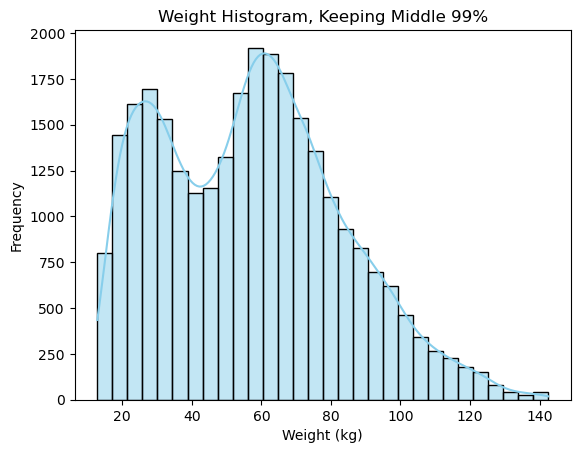

In [51]:
## Weight

weight1_file = "/home/ec2-user/SageMaker/Team-5/data_processing/weight_1_AddBirthYear.csv"
weight1 = pd.read_csv(weight1_file)

print(weight1.describe())

weight1['Weight_kg15'] = weight1['Weightkg'].fillna(weight1['Weightkg_dup15'])
weight1['Weight_kg16'] = weight1['Weight_kg15'].fillna(weight1['Weightkg_dup16'])
weight1['Weight_kg21'] = weight1['Weight_kg16'].fillna(weight1['Weightkg_dup21'])
weight1['Weight_kg'] = weight1['Weight_kg21'].fillna(weight1['Weightkg_dup22'])

del weight1['Weight_kg15']
del weight1['Weight_kg16']
del weight1['Weight_kg21']
del weight1['Weightkg_dup15']
del weight1['Weightkg_dup16']
del weight1['Weightkg_dup21']
del weight1['Weightkg_dup22']
del weight1['Weightkg']

weight1['Weight_lbs15'] = weight1['Weightlbs'].fillna(weight1['Weightlbs_dup15'])
weight1['Weight_lbs16'] = weight1['Weight_lbs15'].fillna(weight1['Weightlbs_dup16'])
weight1['Weight_lbs21'] = weight1['Weight_lbs16'].fillna(weight1['Weightlbs_dup21'])
weight1['Weight_lbs'] = weight1['Weight_lbs21'].fillna(weight1['Weightlbs_dup22'])

del weight1['Weight_lbs15']
del weight1['Weight_lbs16']
del weight1['Weight_lbs21']
del weight1['Weightlbs_dup15']
del weight1['Weightlbs_dup16']
del weight1['Weightlbs_dup21']
del weight1['Weightlbs_dup22']
del weight1['Weightlbs']

weight1['lbs_to_kg'] = weight1['Weight_lbs'] * 0.45359237
del weight1['Weight_lbs']
weight1['all_weights_kg'] = weight1['Weight_kg'].fillna(weight1['lbs_to_kg'])
del weight1['lbs_to_kg']
del weight1['Weight_kg']

print(weight1.describe())
print("-----------------------------------------------------------")
print(weight1.quantile(0.995, numeric_only=True))
print("-----------------------------------------------------------")
print(weight1.quantile(0.005, numeric_only=True))

upper_cutoff_weight1 = weight1['all_weights_kg'].quantile(0.995)
lower_cutoff_weight1 = weight1['all_weights_kg'].quantile(0.005)

weight1 = weight1.drop(weight1[weight1.all_weights_kg > upper_cutoff_weight1].index)
weight1 = weight1.drop(weight1[weight1.all_weights_kg < lower_cutoff_weight1].index)

print(weight1)

## Plot histogram

sns.histplot(weight1['all_weights_kg'], bins=30, kde=True, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.title('Weight Histogram, Keeping Middle 99%')
 
# Display the plot
plt.show()

weight1.to_csv('Weight1_clean.csv', index=False)

          Unnamed: 0         MaskID  f1availableWeightWeight  \
count      46.000000      46.000000                46.000000   
mean   381505.326087  624924.956522                70.436957   
std     74372.705744  218262.527757                57.227493   
min     24777.000000  243158.000000               -10.000000   
25%    398865.500000  437730.250000                34.375000   
50%    398955.000000  636900.500000                50.900000   
75%    399073.750000  816145.750000                97.600000   
max    399136.000000  960990.000000               230.000000   

       f2availableWeightWeight  f3availableWeightWeight  
count                44.000000                11.000000  
mean                 69.184773                61.295455  
std                  57.326270                54.541610  
min                   0.000000                13.500000  
25%                  30.450000                35.950000  
50%                  49.550000                39.150000  
75%              

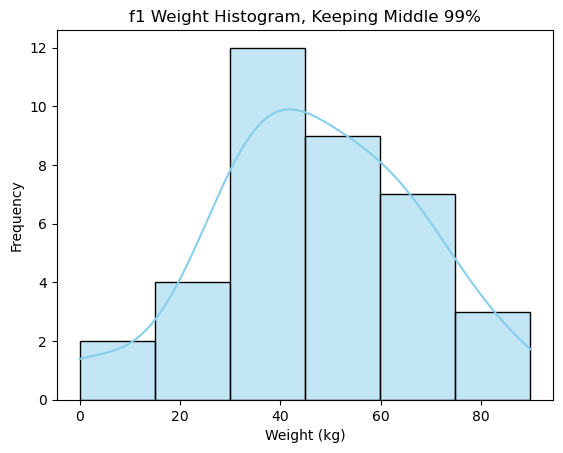

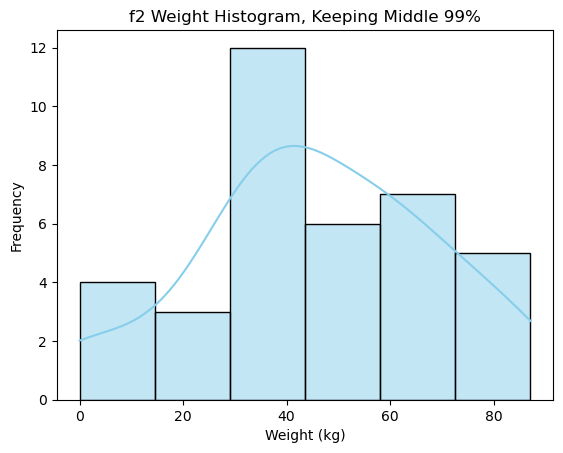

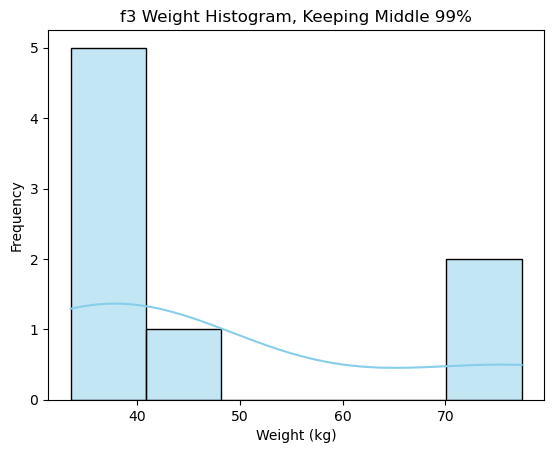

,Unnamed: 0,MaskID,Visit_Dt,f1_weights_kg,f2_weights_kg,f3_weights_kg
0,24777,657216,07/30/2018,65.090505,62.368951,NaN
1,49730,332751,11/22/2019,NaN,NaN,NaN
2,383384,289931,08/19/2019,41.100000,42.500000,NaN
3,385020,367910,01/08/2020,59.000000,56.000000,NaN
4,386398,435150,12/09/2019,78.700000,76.500000,77.400000
5,388001,511949,10/22/2020,37.000000,40.950000,39.150000
6,388349,528175,06/27/2018,34.300000,36.400000,35.000000
7,389699,592585,04/16/2019,29.800000,25.900000,NaN
8,394393,817795,11/14/2018,50.900000,67.000000,NaN
9,395198,857578,10/02/2019,22.400000,22.900000,NaN


In [4]:
## Available Weight

weight2_file = "/home/ec2-user/SageMaker/Team-5/data_processing/weight_2_availableWeight.csv"
weight2 = pd.read_csv(weight2_file)

print(weight2.describe())
print("-----------------------------------------------------------")
print(weight2.quantile(0.995, numeric_only=True))
print("-----------------------------------------------------------")
print(weight2.quantile(0.005, numeric_only=True))
## Negative weight in f1availableWeightWeight
## Weight of zero in f1 and f2availableWeightWeight

weight2['f1weight_units'] = weight2['f1availableWeightWeight'].astype(str) + weight2['f1availableWeightUnits'].astype(str)
weight2['f2weight_units'] = weight2['f2availableWeightWeight'].astype(str) + weight2['f2availableWeightUnits'].astype(str)
weight2['f3weight_units'] = weight2['f3availableWeightWeight'].astype(str) + weight2['f3availableWeightUnits'].astype(str)

del weight2['f1availableWeightWeight']
del weight2['f1availableWeightUnits']
del weight2['f2availableWeightWeight']
del weight2['f2availableWeightUnits']
del weight2['f3availableWeightWeight']
del weight2['f3availableWeightUnits']

cond1 = weight2['f1weight_units'].str.contains('Kg')
weight2['f1_weightkg'] = weight2.loc[cond1, 'f1weight_units']
cond2 = weight2['f2weight_units'].str.contains('Kg')
weight2['f2_weightkg'] = weight2.loc[cond2, 'f2weight_units']
cond3 = weight2['f3weight_units'].str.contains('Kg')
weight2['f3_weightkg'] = weight2.loc[cond3, 'f3weight_units']

cond1 = weight2['f1weight_units'].str.contains('lbs')
weight2['f1_weightlbs'] = weight2.loc[cond1, 'f1weight_units']
cond2 = weight2['f2weight_units'].str.contains('lbs')
weight2['f2_weightlbs'] = weight2.loc[cond2, 'f2weight_units']
cond3 = weight2['f3weight_units'].str.contains('lbs')
weight2['f3_weightlbs'] = weight2.loc[cond3, 'f3weight_units']

weight2['f1_weightkg'] = weight2['f1_weightkg'].str[:-2]
weight2['f2_weightkg'] = weight2['f2_weightkg'].str[:-2]
weight2['f3_weightkg'] = weight2['f3_weightkg'].str[:-2]
weight2['f1_weightlbs'] = weight2['f1_weightlbs'].str[:-3]
weight2['f2_weightlbs'] = weight2['f2_weightlbs'].str[:-3]
weight2['f3_weightlbs'] = weight2['f3_weightlbs'].str[:-3]

weight2['f1_weightkg'] = pd.to_numeric(weight2['f1_weightkg'], errors='coerce')
weight2['f2_weightkg'] = pd.to_numeric(weight2['f2_weightkg'], errors='coerce')
weight2['f3_weightkg'] = pd.to_numeric(weight2['f3_weightkg'], errors='coerce')
weight2['f1_weightlbs'] = pd.to_numeric(weight2['f1_weightlbs'], errors='coerce')
weight2['f2_weightlbs'] = pd.to_numeric(weight2['f2_weightlbs'], errors='coerce')
weight2['f3_weightlbs'] = pd.to_numeric(weight2['f3_weightlbs'], errors='coerce')


weight2['f1_lbs_to_kg'] = weight2['f1_weightlbs'] * 0.45359237
weight2['f2_lbs_to_kg'] = weight2['f2_weightlbs'] * 0.45359237
weight2['f3_lbs_to_kg'] = weight2['f3_weightlbs'] * 0.45359237

weight2['f1_weights_kg'] = weight2['f1_weightkg'].fillna(weight2['f1_lbs_to_kg'])
weight2['f2_weights_kg'] = weight2['f2_weightkg'].fillna(weight2['f2_lbs_to_kg'])
weight2['f3_weights_kg'] = weight2['f3_weightkg'].fillna(weight2['f3_lbs_to_kg'])

del weight2['f1_weightkg']
del weight2['f2_weightkg']
del weight2['f3_weightkg']
del weight2['f1_lbs_to_kg']
del weight2['f2_lbs_to_kg']
del weight2['f3_lbs_to_kg']
del weight2['f1weight_units']
del weight2['f2weight_units']
del weight2['f3weight_units']
del weight2['f1_weightlbs']
del weight2['f2_weightlbs']
del weight2['f3_weightlbs']

## Creating cutoffs and dropping data outside the range

upper_cutoff_f1 = weight2['f1_weights_kg'].quantile(0.995)
lower_cutoff_f1 = weight2['f1_weights_kg'].quantile(0.005)

upper_cutoff_f2 = weight2['f2_weights_kg'].quantile(0.995)
lower_cutoff_f2 = weight2['f2_weights_kg'].quantile(0.005)

upper_cutoff_f3 = weight2['f3_weights_kg'].quantile(0.995)
lower_cutoff_f3 = weight2['f3_weights_kg'].quantile(0.005)

weight2 = weight2.drop(weight2[weight2.f1_weights_kg > upper_cutoff_f1].index)
weight2 = weight2.drop(weight2[weight2.f1_weights_kg < lower_cutoff_f1].index)

weight2 = weight2.drop(weight2[weight2.f2_weights_kg > upper_cutoff_f2].index)
weight2 = weight2.drop(weight2[weight2.f2_weights_kg < lower_cutoff_f2].index)

weight2 = weight2.drop(weight2[weight2.f3_weights_kg > upper_cutoff_f3].index)
weight2 = weight2.drop(weight2[weight2.f3_weights_kg < lower_cutoff_f3].index)

## Plotting histograms

sns.histplot(weight2['f1_weights_kg'], bins=6, kde=True, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.title('f1 Weight Histogram, Keeping Middle 99%')
 
# Display the plot
plt.show()

sns.histplot(weight2['f2_weights_kg'], bins=6, kde=True, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.title('f2 Weight Histogram, Keeping Middle 99%')
 
# Display the plot
plt.show()

sns.histplot(weight2['f3_weights_kg'], bins=6, kde=True, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.title('f3 Weight Histogram, Keeping Middle 99%')
 
# Display the plot
plt.show()

display(weight2)

weight2.to_csv('Weight2_clean.csv', index=False)